In [ ]:
import pandas as pd
import numpy as np
import random as rand
from sklearn import preprocessing
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import classification_report
import statistics
import warnings
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, f1_score ,auc,roc_curve
warnings.filterwarnings('ignore')

In [2]:
precision=[]
recall= []
fscore = []
AUC=[] 
accuracy_sc=[]

precision_train=[]
recall_train= []
fscore_train = []
AUC_train=[] 
accuracy_sc_train=[]

In [3]:
for m in range(30):
    data= pd.read_csv('wdbc.data')
    data.columns=['IDs','Diagnosis','f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20','f21','f22','f23','f24','f25','f26','f27','f28','f29','f30']

    data_x = data.drop(['IDs','Diagnosis'],axis=1)
    data_x_normalize = pd.DataFrame(preprocessing.normalize(data_x))
    data = pd.concat([data[['Diagnosis']],data_x_normalize],axis=1)
    data["Diagnosis"] = data["Diagnosis"].map( {'M':0, 'B':1} )

    data_malignant = data[data['Diagnosis'] == 0]
    data_malignant_20_test = data_malignant.sample(frac=.20,random_state=rand.randint(0,100))
    data_benign = data[data['Diagnosis'] == 1]
    data_benign_20_test= data_benign.sample(frac=.20,random_state=rand.randint(1,100))

    test_data = pd.concat([data_malignant_20_test,data_benign_20_test]) 
    train_data = data.drop(index= test_data.index)
    
    test_x = test_data.drop(['Diagnosis'],axis=1)
    test_y = test_data['Diagnosis']
    train_x = train_data.drop(['Diagnosis'],axis=1)
    train_y=train_data['Diagnosis']
    
    #test model
    parameters = [{'C': [1, 10, 100,1000]}]   
    clf = GridSearchCV(LinearSVC(penalty='l1',dual=False),parameters,cv=5)
    clf.fit(train_x, train_y)
    pred_y = clf.predict(test_x)
    
    # report_dict = classification_report(test_y, y_pred,output_dict=True)
    # report = classification_report(test_y, pred_y)
    precision.append(precision_score(test_y, pred_y))
    recall.append(recall_score(test_y, pred_y))
    accuracy_sc.append(accuracy_score(test_y, pred_y)) 
    fscore.append(f1_score(test_y, pred_y))
    fpr, tpr, _ = roc_curve(test_y,pred_y)
    AUC.append(auc(fpr, tpr))
    
    #train
    parameters = [{'C': [1, 10, 100,1000]}]   
    clf = GridSearchCV(LinearSVC(penalty='l1',dual=False),parameters,cv=5)
    clf.fit(train_x, train_y)
    pred_y_train = clf.predict(train_x)
     
    #report1 = classification_report(test_y, y_pred,output_dict=True)
    # report = classification_report(test_y, pred_y)
    precision_train.append(precision_score(train_y, pred_y_train))
    recall_train.append(recall_score(train_y, pred_y_train))
    accuracy_sc_train.append(accuracy_score(train_y, pred_y_train)) 
    fscore_train.append(f1_score(train_y,pred_y_train))
    fpr_train, tpr_train, _ = roc_curve(train_y,pred_y_train)
    AUC_train.append(auc(fpr_train, tpr_train))
    

In [4]:
print("\n Test Model")
avg_precision = statistics.mean(precision)
avg_recall = statistics.mean(recall)
avg_accuracy_score= statistics.mean(accuracy_sc)
avg_f1score = statistics.mean(fscore)
print("Avg_Precision{}\nAvg_F1-score{}\nAvg_recall{}\nAvg_accuracy_score{}".format(avg_precision,avg_f1score,avg_recall,avg_accuracy_score))

print("\n Train Model")
avg_precision_train = statistics.mean(precision_train)
avg_recall_train = statistics.mean(recall_train)
avg_accuracy_score_train= statistics.mean(accuracy_sc_train)
avg_f1score_train = statistics.mean(fscore_train)
print("Avg_Precision{}\nAvg_F1-score{}\nAvg_recall{}\nAvg_accuracy_score{}".format(avg_precision_train,avg_f1score_train,avg_recall_train,avg_accuracy_score_train))


 Test Model
Avg_Precision0.9615620141892111
Avg_F1-score0.9620538448363787
Avg_recall0.9633802816901409
Avg_accuracy_score0.952212389380531

 Train Model
Avg_Precision0.9718183541921979
Avg_F1-score0.9735995156387518
Avg_recall0.9754079254079254
Avg_accuracy_score0.9667399267399267


Test Area under the curve


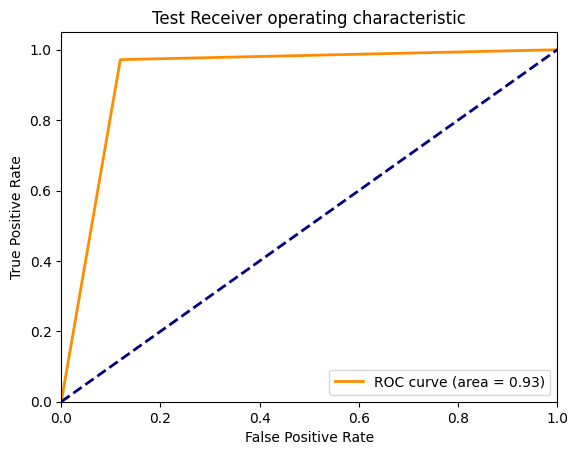

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

print("Test Area under the curve")
plt.figure()
lw=2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' %auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Train Area under the curve


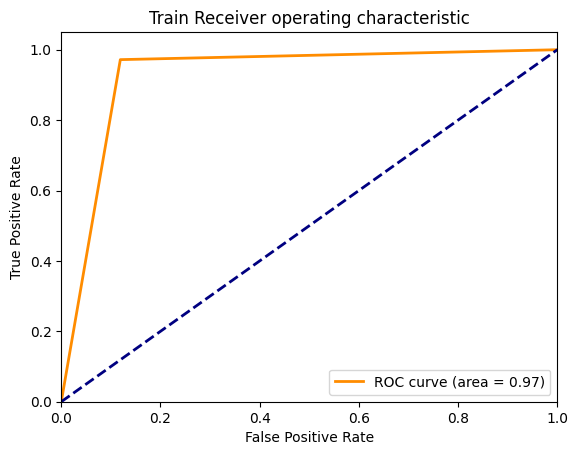

In [6]:
#train area under the curve

print("Train Area under the curve")
plt.figure()
lw=2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' %auc(fpr_train, tpr_train))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Train Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [7]:
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(test_y,pred_y)
print("Confusion Matrix Test: ")
print(conf)

conf_tr = confusion_matrix(train_y,pred_y_train)
print("Confusion Matrix Test: ")
print(conf_tr)

Confusion Matrix Test: 
[[37  5]
 [ 2 69]]
Confusion Matrix Test: 
[[164   5]
 [  7 279]]
